In [1]:
!pip install opendatasets --upgrade --quiet

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
plt.style.use('ggplot')
%matplotlib inline

In [3]:
url = 'https://www.kaggle.com/competitions/cat-in-the-dat-ii/data'
od.download(url)

100%|██████████| 41.3M/41.3M [00:00<00:00, 109MB/s]



Extracting archive ./cat-in-the-dat-ii/cat-in-the-dat-ii.zip to ./cat-in-the-dat-ii


In [4]:
df_train = pd.read_csv('cat-in-the-dat-ii/train.csv')
df_test = pd.read_csv('cat-in-the-dat-ii/test.csv')

In [5]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [6]:
df_test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,...,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,...,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
2,600002,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,...,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
3,600003,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,...,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
4,600004,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,...,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0


In [7]:
df_train.shape

(600000, 25)

In [10]:
df_train.isna().mean() * 100

id        0.000000
bin_0     2.982333
bin_1     3.000500
bin_2     2.988333
bin_3     3.002333
bin_4     3.007833
nom_0     3.042000
nom_1     3.026000
nom_2     3.005833
nom_3     3.020167
nom_4     3.005833
nom_5     2.963000
nom_6     3.021833
nom_7     3.000500
nom_8     2.959167
nom_9     3.012167
ord_0     3.048000
ord_1     3.006833
ord_2     3.012500
ord_3     2.986000
ord_4     2.988333
ord_5     2.952167
day       2.992000
month     2.998000
target    0.000000
dtype: float64

In [11]:
df_test.isna().mean() * 100

id       0.00000
bin_0    2.97525
bin_1    3.00950
bin_2    2.99300
bin_3    2.98775
bin_4    2.98775
nom_0    3.01550
nom_1    2.98675
nom_2    3.04475
nom_3    3.04400
nom_4    2.99825
nom_5    2.97800
nom_6    3.00300
nom_7    3.00075
nom_8    2.98900
nom_9    3.01500
ord_0    2.97325
ord_1    3.04175
ord_2    3.02625
ord_3    3.01325
ord_4    2.98325
ord_5    3.01175
day      3.00625
month    2.99600
dtype: float64

In [12]:
df_train.target.value_counts(normalize=True)

0    0.812795
1    0.187205
Name: target, dtype: float64

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

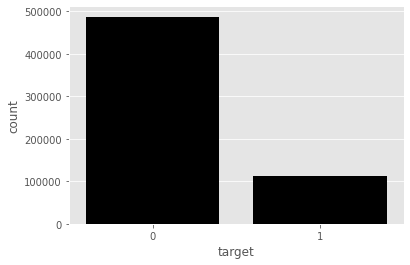

In [18]:
sns.countplot(data=df_train, x='target', color='k')